In [1]:
import numpy as np
from math import log
import math as m
from scipy import stats

import matplotlib.pyplot as plt
%precision 4

u'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. <br> 
Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-\frac{t}{\tau}}$. <br><br> Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. <br> Plot the evolution of the two sets as a function of time 

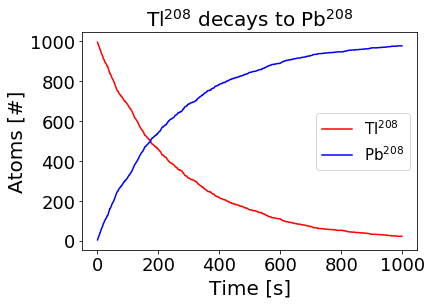

In [2]:
tau=3.052*60
def prob0(t):
    return 1-2**(-(t)/(tau))
def prob(t):
    return (log(2)/tau)*2**(-t/tau)
N0_Tl = 1000
N_Tl_elem=N0_Tl
N_Pb_elem=0
draws = np.random.uniform(0, 1,1000)
t_max=1000
times=np.array([])
N_Tl=np.array([])
N_Pb=np.array([])

for t in range(1, t_max):
    times=np.append(times,t)
    for i in range(len(draws)):
        if(i>=len(draws)):
            break
        if(draws[i]<(prob0(t)) and N_Tl_elem>0):
            draws=np.delete(draws,[i])
            N_Tl_elem=N_Tl_elem-1
            N_Pb_elem=N_Pb_elem+1
    N_Tl=np.append(N_Tl,N_Tl_elem)
    N_Pb=np.append(N_Pb,N_Pb_elem)
    
plt.plot(times,N_Tl,c="r",label=r"${\rm Tl}^{208}$")
plt.plot(times,N_Pb,c="b",label=r"${\rm Pb}^{208}$")
plt.xlabel("Time [s]",fontsize=20)
plt.tick_params(labelsize=18)
plt.title(r"${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$",fontsize=20)
plt.ylabel("Atoms [#]",fontsize=20)
plt.legend(fontsize=15,loc="best")
plt.show()

 
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $$p(t)=2^{-\frac{t}{\tau}}\left( \frac{\ln 2}{\tau}\right) $$ to represent the times of decay of the 1000 Tl atoms. 

Make a plot showing the number of atoms that have not decayed as a function of time

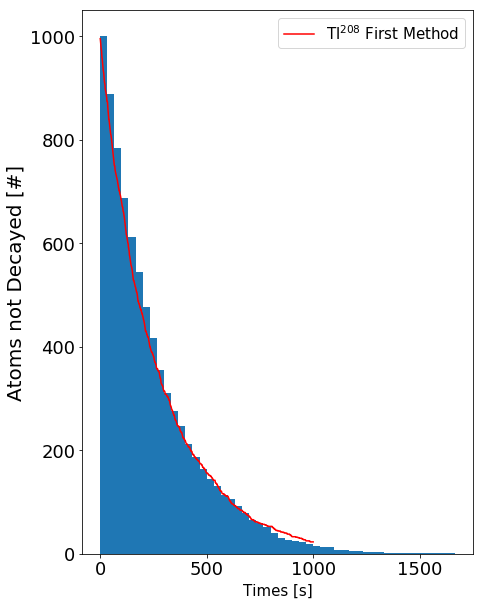

In [3]:
def expon1(p, mu=np.log(2)/tau):
    return -np.log(1-p)/mu
x = np.random.uniform(0,1,1000)
fig, ax = plt.subplots(1,1, figsize=(7, 10))
t=expon1(x)
ax.hist(t,bins=50,cumulative=-1)
ax.plot(times,N_Tl,c="r",label=r"${\rm Tl}^{208}$ First Method")
ax.set_ylabel("Atoms not Decayed [#]",fontsize=20)
ax.set_xlabel(r"Times [s]",fontsize=15)
ax.tick_params(labelsize=18)
ax.legend(fontsize=15,loc="best")

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{\theta}{2}} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where:
1. $E=7.7$ MeV
2. $b$ beam is the impact parameter. 

The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

Fraction of particles :  0.1553 %


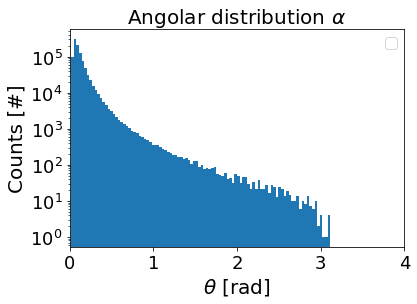

In [4]:
Z=79
particles=10**(6)
e_charge=1.602176565*10**(-19)
E=7.7*10**(6)*e_charge
a0=5.2917721067*10**(-11)
e0=8.8541878176*10**(-12)
x = np.random.normal(0, a0/100, particles)
y = np.random.normal(0, a0/100, particles)
r=np.sqrt(np.power(x,2)+np.power(y,2))
cost=(Z*e_charge**2)/(2*np.pi*e0*E)
theta=2*np.arctan(cost/r)
print "Fraction of particles : ",(float(len(theta[theta>np.pi/2]))/particles)*100,"%"
plt.hist(theta,bins=100)
plt.xlim(0,4)
plt.yscale('log')
plt.xlabel(r"$\theta$ [rad]",fontsize=20)
plt.tick_params(labelsize=18)
plt.title(r"Angolar distribution $\alpha$",fontsize=20)
plt.ylabel("Counts [#]",fontsize=20)
plt.legend(fontsize=15,loc="best")
plt.show()

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2\left(\frac{1}{x(2-x)}\right)$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. <br> 


<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<font color='green'>
The correct result at the sixth significant digit is:

$$I=1.45140$$
<font color='green'>
It was decided to understand the error not as the result of the difference with the correct value of the integral known a priori. Theoretically, in fact, in a concrete example where the algorithm is useful it is not known. <br> 
It was rather understood as the uncertainty that the method itself determines on its result. <br>
The formula used is found in [this](http://cis.poly.edu/~mleung/CS909/s04/mc4.pdf#page=14) document.
</font>

In [5]:
def integral_hit_miss_1D(f,N,h,a,b):
    count=0
    for j in range(N):
        x=np.random.uniform(a, b)
        y=np.random.uniform(0, h)
        if y<f(x): count+=1
    I=(b-a)*h*(float(count)/float(N))
    errI = 0.67*m.sqrt(I*((b-a)*h-I)/N)
    return round(I,6),round(errI,6)
def f(x):
    return (np.sin(1/(x*(2-x))))**2


N0=100000
I,err=integral_hit_miss_1D(f,N0,1,0,2)
print "I = ",I,"+-",err

I =  1.45062 +- 0.001891


Evaluate the error of your estimate
* Repeat the integral with the mean value method. <br> Evaluate the error and compare it with the previous one

In [6]:
def integral_mean_value(f,N,a,b):
    x=np.random.uniform(a, b)
    sum0=np.array([])
    for j in range(N):
        x=np.random.uniform(a, b)
        sum0=np.append(sum0,f(x))
    I=(float(b-a)/float(N))*np.sum(sum0)
    err=((b-a)/m.sqrt(N))*np.std(sum0)
    return round(I,6),round(err,6)


N1=100000
I,err=integral_mean_value(f,N1,0,2)
print "I = ",I,"+-",err

I =  1.450834 +- 0.001669


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

In [7]:
def n_sphere(array):
    a=sum(np.power(x,2) for x in array)
    if a <=1: return 1
    else: return 0

N0=100000
count0=0
dimension0=2
for j in range(N0):
    x0=np.random.uniform(-1,1,dimension0)
    if n_sphere(x0)==1: count0+=1
volume0=2**dimension0
I0=volume0*(float(count0)/float(N0))
errI0 = 0.67*m.sqrt(I0*(volume0-I0)/N0)
    
print "I = ",round(I0,6),"+-",round(errI0,6)

I =  3.14184 +- 0.003479


* Generalize the result for a 10D sphere

In [8]:
N1=100000
count1=0
dimension1=10
for j in range(N1):
    x1=np.random.uniform(-1,1,dimension1)
    if n_sphere(x1)==1: count1+=1
volume1=2**dimension1
I1=volume1*(float(count1)/float(N1))
errI1 = 0.67*m.sqrt(I1*(volume1-I1)/N1)
    
print "I = ",round(I1,6),"+-",round(errI1,6)

I =  2.7136 +- 0.111538


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. 

$$I=0.83893$$

In [9]:
def weight(x):
    return 1/np.sqrt(x)
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))
N=500000
np.random.seed(9032)
x=np.random.uniform(0,1,N)
integralparz,error=integral_mean_value(weight,N,0,1)
intetot=(sum((f(x[i])/weight(x[i])) for i in range(N))/N)*integralparz
print "I = ",intetot

I =  0.7586184023886204
